In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Modelo parásito 

Simulación y curva teórica del circuito propuesto en el apunte [Inducción con parásitos](../..Apuntes/4.Magnetismo//2-%20Induccion%20con%20componentes%20parasitos.md)

Datos de la simulación:

In [19]:
df = pd.read_csv('data/induc_paras_2.txt', 
                 sep='\t|,',  
                 engine='python',  
                 skiprows=1, 
                 names=['f', 'Tr', 'Ti'],
                 dtype='float'
)


Rutinas para calcular las impedancias

In [20]:
def get_Z1(w, R1,C1):
    zc = 1.0/(1j*w*C1)
    zr = R1

    return zc*zr/(zc+zr)

def get_ZL1(w, r1, L1):

    return r1+ 1j*w*L1


def get_ZL2(w, r2, L2):

    return r2+ 1j*w*L2

def get_Z2(w, R2,C2):
    
    zc = 1.0/(1j*w*C2)
    zr = R2
    return zc*zr/(zc+zr)


def get_Zsec(w, r2, L2, R2,C2):
    ZL2 = get_ZL2( w, r2, L2 )
    Z2 = get_Z2( w, R2, C2 )
    return ZL2+Z2 

def get_Zref( w, r2, L2, R2,C2, M ):

    Zsec= get_Zsec(w, r2, L2, R2,C2)
    return ((w*M)**2)/Zsec


def get_ZM( w, M ):

    return 1j*w*M


# ec de transferencia
def Transf(f, R, R1,C1,r1,L1, R2,C2,r2,L2, k):

    w =2*np.pi*f

    M = k*np.sqrt(L1*L2)

    ZM  = get_ZM( w, M )
    Z1  = get_Z1(w, R1,C1)
    Z2  = get_Z1(w, R2,C2)
    ZL2 = get_ZL2(w, r2, L2)
    Zsec= get_Zsec(w, r2, L2, R2,C2)
    Zref= get_Zref( w, r2, L2, R2,C2, M )
    ZL1 = get_ZL1(w, r1, L1)

    zV2 = ZM*(-1+ ZL2/(Zsec))

    zVR = R*(ZL1+Zref+Z1)/(Z1)


    return abs(zV2/zVR)


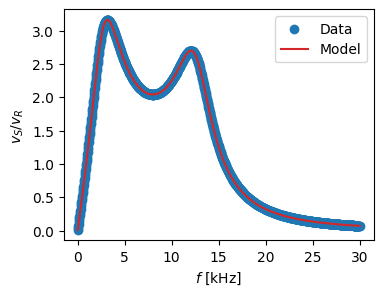

In [21]:
# valores de las componentes
R= 100
R1 =1e3
C1 =50e-9
r1 =10 
L1 =10e-3
R2 =1e3 
C2 =50e-9
r2 =50
L2 =50e-3
k  =0.8

pars = [R, R1,C1,r1,L1, R2,C2,r2,L2, k]

# datos a plotear
T_exp = df["Tr"]                    # data de simulacion
T_mod = Transf( df["f"], *pars )    # modelo
f = df["f"].to_numpy() /1000        # freq en kHz

# plot
fig, ax = plt.subplots(figsize=(4,3))

ax.scatter( f, T_exp , label='Data')   

ax.plot( f,T_mod , c='C3', label='Model')

ax.set_ylabel("$v_S/v_R$ ")
ax.set_xlabel("$f$ [kHz]")
plt.legend()
plt.show()


### Ejemplo de como usar la rutina Transf para ajustar datos reales

Si tienen datos reales y quieren ajustar la curva utilizando este modelo, lo conveniente es ir ajustando de a pares de parámetros.
Esto funciona mejor dado que la expresión tiene muchos parametros, 10 en total.

Por ejemplo si queremos ajustar k, R1, y C1 primero, definimos la rutina del curve fit así:

In [22]:
def modelo( f, k, R1, C1 ):

    # aca pongo el resto de los parametros que no estoy ajustando
    R= 100
    #R1 =1e3
    #C1 =50e-9
    r1 =10 
    L1 =10e-3
    R2 =1e3 
    C2 =50e-9
    r2 =50
    L2 =50e-3
    #k  =0.8

    pars = [R, R1,C1,r1,L1, R2,C2,r2,L2, k]

    return Transf( f, *pars )

Una vez que obtengo esos parámetros, los fijo y ajusto otros, y así con todos hasta obtener a algo razonable.